In [66]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [67]:
def process_year(year):
    df = pd.read_html('./data/{}.html'.format(year),
                      header=1,
                      index_col=['Category'])[0]

    df = df.drop(['Total', 'Average'], axis=1)

    df = df.rename(index=str, columns={'January': '{}-01'.format(year),
                                       'February': '{}-02'.format(year),
                                       'March': '{}-03'.format(year),
                                       'April': '{}-04'.format(year),
                                       'May': '{}-05'.format(year),
                                       'June': '{}-06'.format(year),
                                       'July': '{}-07'.format(year),
                                       'August': '{}-08'.format(year),
                                       'September': '{}-09'.format(year),
                                       'October': '{}-10'.format(year),
                                       'November': '{}-11'.format(year),
                                       'December': '{}-12'.format(year),
                                      })

    df = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

    return df

In [68]:
df = process_year(2017)

df.head()

,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
Category,,,,,,,,,,
Bandwidth Charge,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.01,0.01,0.00
DNS Charge,0.09,0.10,0.10,0.11,0.10,0.10,0.10,0.10,0.11,0.04
Resource Charge,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00
Site Charge,0.28,0.31,0.30,0.31,0.30,0.31,0.31,0.30,0.31,0.78
Storage Charge,0.17,0.15,0.16,0.08,0.07,0.11,0.13,0.12,0.18,0.08


In [69]:
dfs = []

for year in range(2009, 2018):
    dfs.append(process_year(year))

len(dfs)

9

In [70]:
df = pd.concat(dfs, axis=1)

df.head()

,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-02,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11
Bandwidth Charge,0.01,0.0,0.01,0.00,0.01,0.01,0.01,0.01,0.02,0.02,...,0.00,0.0,0.0,0.00,0.0,0.04,0.0,0.01,0.01,0.00
DNS Charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,0.09,0.1,0.1,0.11,0.1,0.10,0.1,0.10,0.11,0.04
Deposit Fee,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domain Registration,0.00,0.0,0.00,8.59,0.00,0.00,0.00,0.00,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domain Renewal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
print(plt.style.available)
plt.style.use('seaborn-talk')

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2']


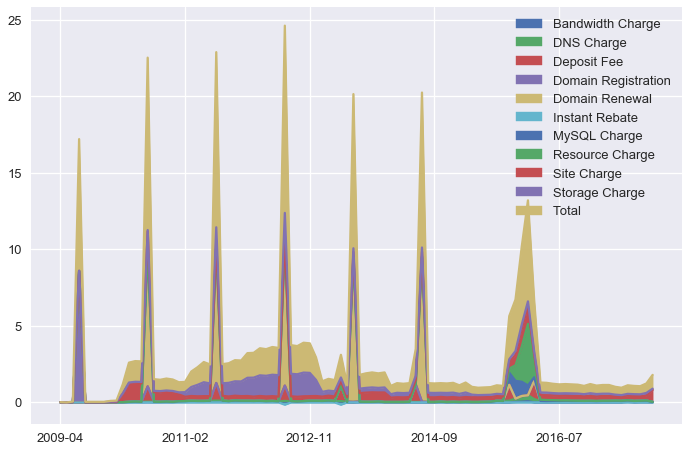

In [96]:
df.transpose().plot(kind='area')